In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading The Data

In [124]:
df = pd.read_csv('cars_practice_dirty.csv')
pd.set_option("display.max_rows", 10) 

print(df.head().to_string())

   Car ID  Brand     Model                  Year Engine Size Fuel Type    Mileage (km) Price (USD) Owner Type     Location
0       1   Audi  3 Series  Two Thousand Fifteen        2.0L    Diesel           20000         NaN     second      Houston
1       2    BMW   Model X                  2019    Electric    Diesel  Forty Thousand        7500      First      Houston
2       3  Tesla   Model X                  2018    Electric    Petrol           35000      $15000      First     New York
3       4   Audi     Focus                  2019  two liters    petrol           65000       30000      Third     New York
4       5   Ford     Focus                  2014         NaN       GAS           75000       20000     Second  Los Angeles


## 2. Understanding the Data

- **df.info()**            # Overview of datatypes and missing values
- **df.head()**            # Peek at the data
- **df.describe()**        # Summary statistics for numeric columns
- **df.columns**           # List of all columns

In [125]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car ID        35 non-null     int64 
 1   Brand         33 non-null     object
 2   Model         33 non-null     object
 3   Year          34 non-null     object
 4   Engine Size   28 non-null     object
 5   Fuel Type     34 non-null     object
 6   Mileage (km)  31 non-null     object
 7   Price (USD)   27 non-null     object
 8   Owner Type    34 non-null     object
 9   Location      34 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.9+ KB
None


In [126]:
df.isnull().sum() 

Car ID          0
Brand           2
Model           2
Year            1
Engine Size     7
Fuel Type       1
Mileage (km)    4
Price (USD)     8
Owner Type      1
Location        1
dtype: int64

In [127]:
df.describe()

,Car ID
count,35.000000
mean,15.742857
std,8.286569
min,1.000000
25%,9.500000
50%,16.000000
75%,22.000000
max,30.000000


In [128]:
df.columns.tolist()

['Car ID',
 'Brand',
 'Model',
 'Year',
 'Engine Size',
 'Fuel Type',
 'Mileage (km)',
 'Price (USD)',
 'Owner Type',
 'Location']

## 3. Remove Duplicates

In [129]:
df.duplicated().sum()

np.int64(5)

In [130]:
df = df.drop_duplicates()

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car ID        30 non-null     int64 
 1   Brand         29 non-null     object
 2   Model         28 non-null     object
 3   Year          29 non-null     object
 4   Engine Size   23 non-null     object
 5   Fuel Type     29 non-null     object
 6   Mileage (km)  27 non-null     object
 7   Price (USD)   23 non-null     object
 8   Owner Type    29 non-null     object
 9   Location      29 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.6+ KB


In [132]:
df.isnull().sum()

Car ID          0
Brand           1
Model           2
Year            1
Engine Size     7
Fuel Type       1
Mileage (km)    3
Price (USD)     7
Owner Type      1
Location        1
dtype: int64

## 4. Fixing Wrong Data Types

In [133]:
df.dtypes

Car ID           int64
Brand           object
Model           object
Year            object
Engine Size     object
Fuel Type       object
Mileage (km)    object
Price (USD)     object
Owner Type      object
Location        object
dtype: object

In [134]:
# cols = ['Year', 'Mileage (km)', 'Price (USD)']

# for x in cols :
#     df[x] = pd.to_numeric(df[x], errors='coerce')

df['Year'] = pd.to_numeric(df['Year'], errors='coerce', downcast='integer')
df['Mileage (km)'] = pd.to_numeric(df['Mileage (km)'], errors='coerce', downcast='integer')
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'].replace('$', ''), errors='coerce')

df.dtypes

Car ID            int64
Brand            object
Model            object
Year            float64
Engine Size      object
Fuel Type        object
Mileage (km)    float64
Price (USD)     float64
Owner Type       object
Location         object
dtype: object

In [135]:
print(df.head().to_string())

   Car ID  Brand     Model    Year Engine Size Fuel Type  Mileage (km)  Price (USD) Owner Type     Location
0       1   Audi  3 Series     NaN        2.0L    Diesel       20000.0          NaN     second      Houston
1       2    BMW   Model X  2019.0    Electric    Diesel           NaN       7500.0      First      Houston
2       3  Tesla   Model X  2018.0    Electric    Petrol       35000.0          NaN      First     New York
3       4   Audi     Focus  2019.0  two liters    petrol       65000.0      30000.0      Third     New York
4       5   Ford     Focus  2014.0         NaN       GAS       75000.0      20000.0     Second  Los Angeles


## 5. Standardizing 

In [136]:
x, y = 'Engine Size', 'Owner Type'

# df[x] = df[x].astype(str).str.lower().str.strip() 

df[x] = df[x].replace({
    'electric' : "Electric",
    'two liters' : '2.0L'
     })

# df[y] = df[y].astype(str).str.lower().str.strip()

df[y] = df[y].replace({
    'first'   : 'First',
    '1' : 'First',
    'second' : 'Second',
    '2' : 'Second',
    'third' : 'Third',
    '3' : 'Third'
})

print(df.head(7))


   Car ID  Brand     Model    Year Engine Size Fuel Type  Mileage (km)  \
0       1   Audi  3 Series     NaN        2.0L    Diesel       20000.0   
1       2    BMW   Model X  2019.0    Electric    Diesel           NaN   
2       3  Tesla   Model X  2018.0    Electric    Petrol       35000.0   
3       4   Audi     Focus  2019.0        2.0L    petrol       65000.0   
4       5   Ford     Focus  2014.0         NaN       GAS       75000.0   
5       6  Tesla     Camry  2011.0         NaN    petrol       55000.0   
6       7  Tesla     Civic  2013.0        2.0L    Diesel       20000.0   

   Price (USD) Owner Type     Location  
0          NaN     Second      Houston  
1       7500.0      First      Houston  
2          NaN      First     New York  
3      30000.0      Third     New York  
4      20000.0     Second  Los Angeles  
5      27500.0      First     New York  
6      15000.0      First          404  


In [137]:
x, y = 'Fuel Type', 'Location'

df[x] = df[x].replace({
    'GAS' or 'gas' : 'Gas',
    'petrol' or 'PETROL': 'Petrol',
    'diesel' or 'Diesel': 'Diesel',
    
})

df.at[6, 'Location'] = None

print(df.loc[6, 'Location'])

None


## 6. Handle Missing Values

In [138]:
df.isnull().sum()

Car ID          0
Brand           1
Model           2
Year            2
Engine Size     7
Fuel Type       1
Mileage (km)    4
Price (USD)     8
Owner Type      1
Location        2
dtype: int64

In [139]:
df['Brand'] = df['Brand'].fillna(df['Brand'].mode()[0])
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])
df['Engine Size'] = df['Engine Size'].fillna(df['Engine Size'].mode()[0])
df['Fuel Type'] = df['Fuel Type'].fillna(df['Fuel Type'].mode()[0])
df['Mileage (km)'] = df['Mileage (km)'].fillna(df['Mileage (km)'].median())
df['Price (USD)'] = df['Price (USD)'].fillna(round(df['Price (USD)'].mean()))
df['Owner Type'] = df['Owner Type'].fillna(df['Owner Type'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

print(df.head())


   Car ID  Brand     Model    Year Engine Size Fuel Type  Mileage (km)  \
0       1   Audi  3 Series  2011.0        2.0L    Diesel       20000.0   
1       2    BMW   Model X  2019.0    Electric    Diesel       45000.0   
2       3  Tesla   Model X  2018.0    Electric    Petrol       35000.0   
3       4   Audi     Focus  2019.0        2.0L    Petrol       65000.0   
4       5   Ford     Focus  2014.0        1.5L       Gas       75000.0   

   Price (USD) Owner Type     Location  
0      18977.0     Second      Houston  
1       7500.0      First      Houston  
2      18977.0      First     New York  
3      30000.0      Third     New York  
4      20000.0     Second  Los Angeles  


In [140]:

# df.at[0, "Mileage (km)"] = -1000
# print(df.head())

## 7 fix Outliers

In [141]:
# df = df[df['Mileage (km)'] >= 0]
# df = df[df['Price (USD)'] >= 0]

# print(df.head())

In [142]:
# df = df[(df['Year'] >= 1990) & (df['Year'] <= 2025)]

## 8. Rename Columns 

In [143]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [144]:
df.head(5)

,car_id,brand,model,year,engine_size,fuel_type,mileage_(km),price_(usd),owner_type,location
0,1,Audi,3 Series,2011.0,2.0L,Diesel,20000.0,18977.0,Second,Houston
1,2,BMW,Model X,2019.0,Electric,Diesel,45000.0,7500.0,First,Houston
2,3,Tesla,Model X,2018.0,Electric,Petrol,35000.0,18977.0,First,New York
3,4,Audi,Focus,2019.0,2.0L,Petrol,65000.0,30000.0,Third,New York
4,5,Ford,Focus,2014.0,1.5L,Gas,75000.0,20000.0,Second,Los Angeles


## 9. Recheck Cleanedd Data

In [145]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_id        30 non-null     int64  
 1   brand         30 non-null     object 
 2   model         30 non-null     object 
 3   year          30 non-null     float64
 4   engine_size   30 non-null     object 
 5   fuel_type     30 non-null     object 
 6   mileage_(km)  30 non-null     float64
 7   price_(usd)   30 non-null     float64
 8   owner_type    30 non-null     object 
 9   location      30 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.6+ KB


car_id          0
brand           0
model           0
year            0
engine_size     0
fuel_type       0
mileage_(km)    0
price_(usd)     0
owner_type      0
location        0
dtype: int64

## 10. Checking Correlation 


In [146]:
print(df.corr(numeric_only = True))

                car_id      year  mileage_(km)  price_(usd)
car_id        1.000000 -0.065608     -0.044548    -0.133764
year         -0.065608  1.000000     -0.049608    -0.035043
mileage_(km) -0.044548 -0.049608      1.000000     0.157629
price_(usd)  -0.133764 -0.035043      0.157629     1.000000


<Axes: >

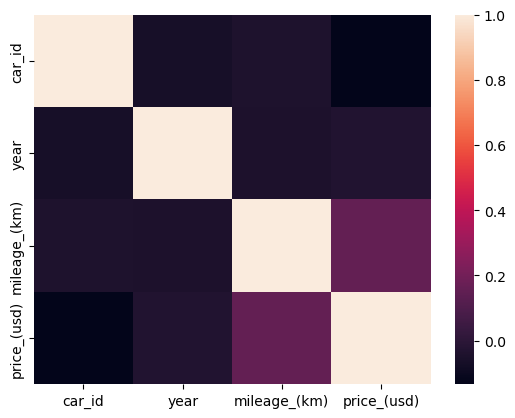

In [147]:
sns.heatmap(df.corr(numeric_only = True))

## 11. Plotting

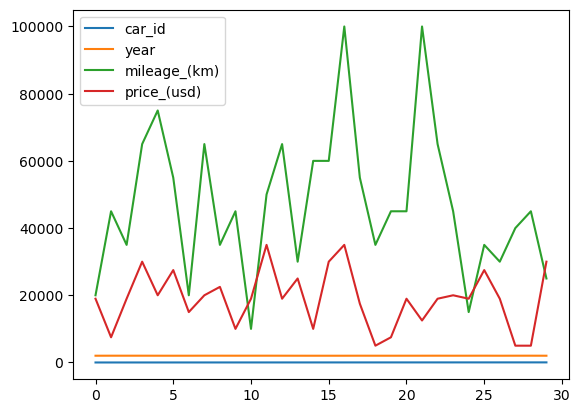

In [148]:
df.plot()
plt.show()

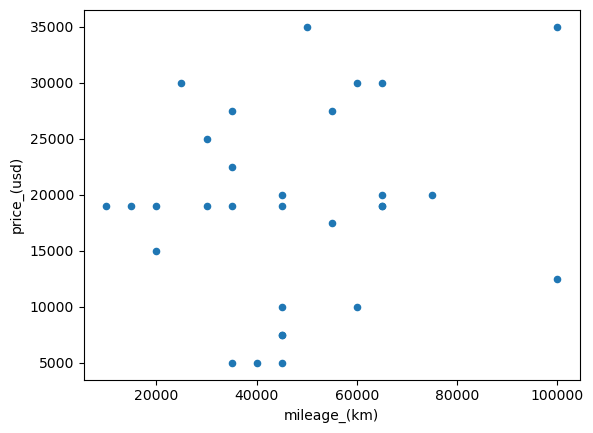

In [149]:
df.plot(kind = 'scatter', x = 'mileage_(km)', y = 'price_(usd)')
plt.show()

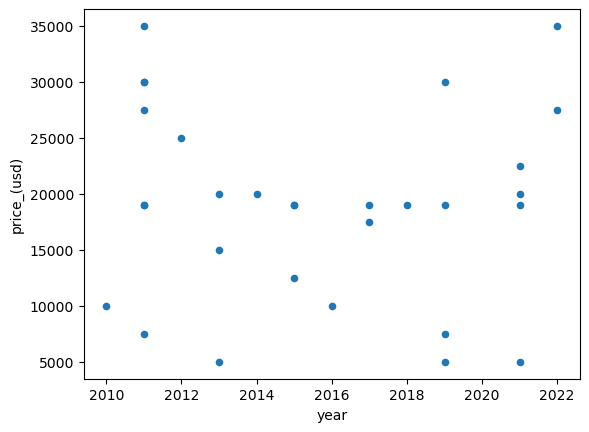

In [150]:
df.plot(kind = 'scatter', x = 'year', y = 'price_(usd)')
plt.show()

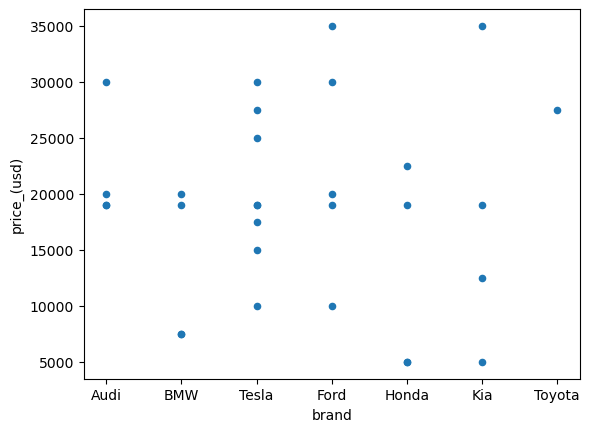

In [151]:
df.plot(kind = 'scatter', x = 'brand', y = 'price_(usd)')
plt.show()

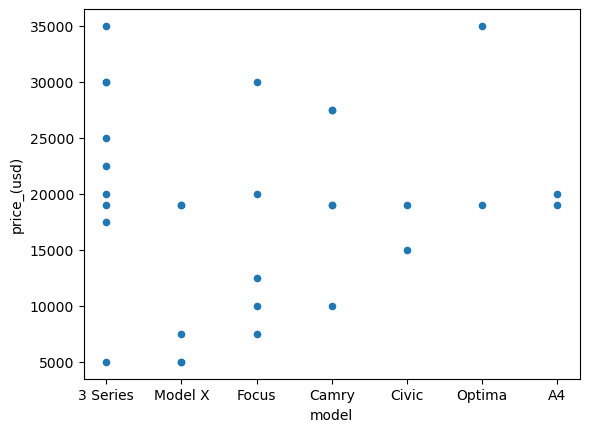

In [152]:
df.plot(kind = 'scatter', x = 'model', y = 'price_(usd)')
plt.show()

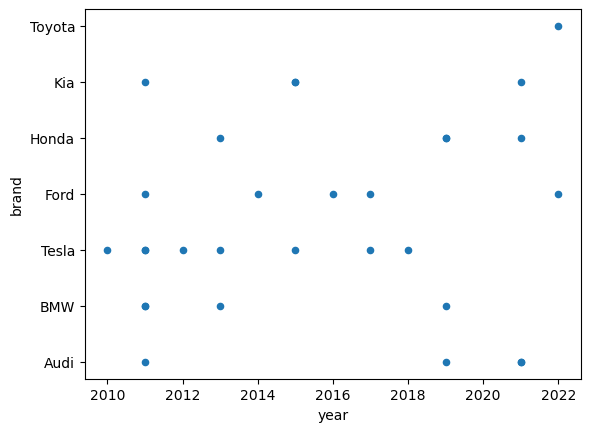

In [153]:
df.plot(kind = 'scatter', x = 'year', y = 'brand')
plt.show()

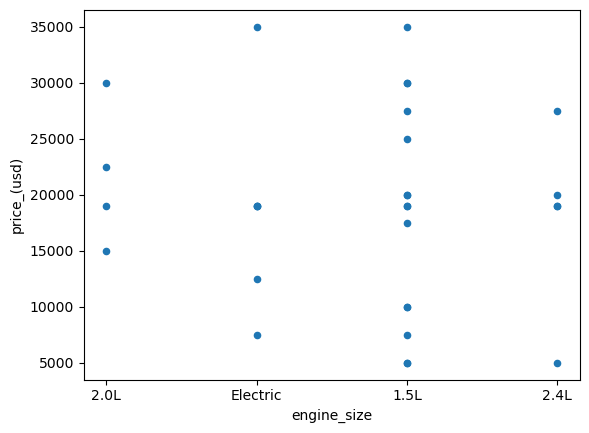

In [154]:
df.plot(kind = 'scatter', x = 'engine_size', y = 'price_(usd)')
plt.show()

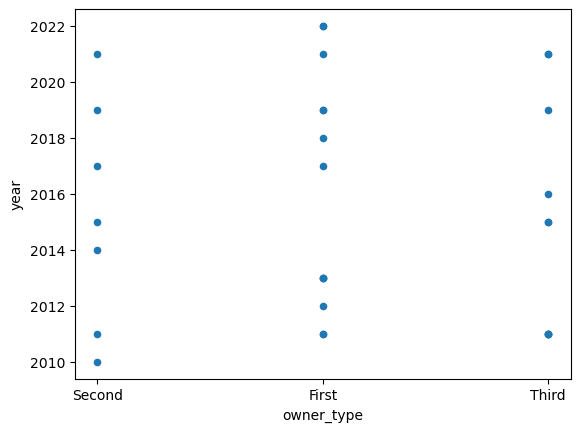

In [155]:
df.plot(kind = 'scatter', y = 'year', x = 'owner_type')
plt.show()

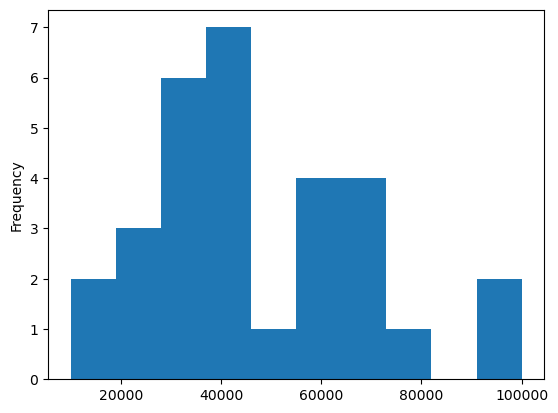

In [156]:
df["mileage_(km)"].plot(kind = 'hist')
plt.show()

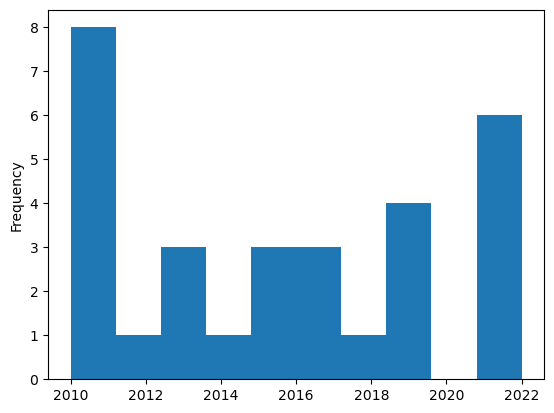

In [157]:
df['year'].plot(kind = 'hist')
plt.show()

## 12. Saving the cleaned data set

In [158]:
df.to_csv("cleaned_cars_practice.csv", index=False)